In [20]:
import qlib
import pandas as pd
from qlib.constant import REG_CN
from qlib.contrib.data.handler import Alpha360,Alpha158
from qlib.data import D
import seaborn as sns
import matplotlib.pyplot as plt
qlib.init(provider_uri='../qlib_data/qlib_bin', region=REG_CN)

[7872:MainThread](2025-06-07 17:29:09,439) INFO - qlib.Initialization - [config.py:420] - default_conf: client.
[7872:MainThread](2025-06-07 17:29:09,443) INFO - qlib.Initialization - [__init__.py:74] - qlib successfully initialized based on client settings.
[7872:MainThread](2025-06-07 17:29:09,444) INFO - qlib.Initialization - [__init__.py:76] - data_path={'__DEFAULT_FREQ': WindowsPath('E:/MYRL/tutorial/qlib_data/qlib_bin')}


In [37]:
instruments = ['SH600000', 'SH600009', 'SH600010', 'SH600011', 'SH600015', 'SH600016', 'SH600018', 'SH600019', 'SH600023', 'SH600025']
fields = ['$close', '$volume', 'Ref($close, 1)', 'Mean($close, 3)', '$high-$low']
data = D.features(instruments, fields, start_time='2025-01-01', end_time='2025-03-31', freq='day')
data = data.swaplevel(0,1).sort_index()

In [ ]:
data
# 数据应该要有2个multiindex，一个是时间，一个是股票代码。

$close       $volume  Ref($close, 1)  \
datetime   instrument                                            
2025-01-02 SH600000    15.220149  5.251783e+05       15.460821   
           SH600009     3.262041  1.463087e+06        3.344423   
           SH600010     3.282937  2.335608e+06        3.373650   
           SH600011     2.239786  1.736556e+06        2.311453   
           SH600015     8.690522  6.185577e+05        8.982592   
...                          ...           ...             ...   
2025-03-31 SH600016     9.380822  1.555254e+06        9.669178   
           SH600018     2.501319  8.672151e+05        2.488127   
           SH600019     3.568012  1.382062e+06        3.632287   
           SH600023     1.206081  4.100875e+06        1.186937   
           SH600025     3.544872  1.064506e+06        3.500000   

                       Mean($close, 3)  $high-$low  
datetime   instrument                               
2025-01-02 SH600000          15.470460    0.555919  
           SH600009           3.338509    0.125350  
           SH600010           3.367891    0.145102  
           SH600011           2.295602    0.092186  
           SH600015           8.918762    0.403689  
...                                ...         ...  
2025-03-31 SH600016           9.589270    0.216481  
           SH600018           2.494283    0.038814  
           SH600019           3.625810    0.084245  
           SH600023           1.192568    0.038087  
           SH600025           3.505342    0.061919  

[570 rows x 5 columns]

In [ ]:
# price将会被用到计算reward
price = data['$close']
price.xs(pd.Timestamp('2025-01-02'), level=0).values

array([15.220149 ,  3.2620406,  3.2829373,  2.2397857,  8.690522 ,
        9.6452055,  2.5778365,  3.4289985,  1.1587838,  3.5769231],
      dtype=float32)

# SH600000 的价格可视化

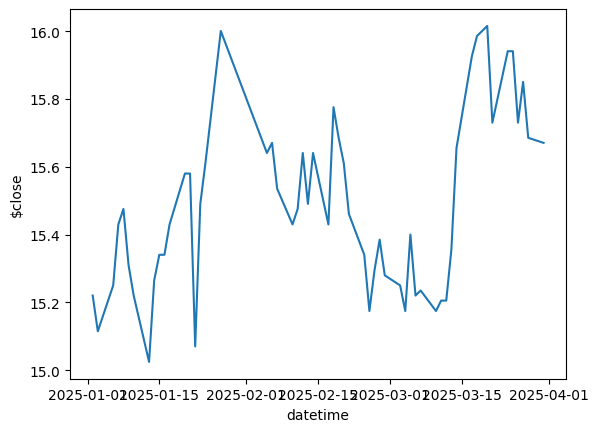

In [38]:
sns.lineplot(data=data[data.index.get_level_values(1) == 'SH600000'], x=data[data.index.get_level_values(1) == 'SH600000'].index.get_level_values(0), y='$close')
plt.show()

# 特征工程


特征(因子) 将会是  observation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
features = data.drop(columns=['$close'])
min_max_scaler = MinMaxScaler()
min_max_scaler = min_max_scaler.fit(features)


In [75]:
original_index = features.index
original_columns = features.columns
values = features.values
scaled_values = min_max_scaler.fit_transform(values)
features = pd.DataFrame(scaled_values, index=original_index, columns=original_columns)
features

$volume  Ref($close, 1)  Mean($close, 3)  $high-$low
datetime   instrument                                                       
2025-01-02 SH600000    0.056434        0.962822         0.964404    0.947980
           SH600009    0.210303        0.151228         0.150320    0.202405
           SH600010    0.353445        0.153186         0.152292    0.236608
           SH600011    0.255167        0.082037         0.080339    0.144978
           SH600015    0.071753        0.528890         0.524769    0.684378
...                         ...             ...              ...         ...
2025-03-31 SH600016    0.225423        0.574880         0.569762    0.360208
           SH600018    0.112547        0.093871         0.093671    0.052557
           SH600019    0.197010        0.170510         0.169599    0.131226
           SH600023    0.643047        0.006713         0.006322    0.051299
           SH600025    0.144913        0.161649         0.161515    0.092567

[570 rows x 4 columns]

In [76]:
date_index = features.index.get_level_values(0).unique()
date_index

DatetimeIndex(['2025-01-02', '2025-01-03', '2025-01-06', '2025-01-07',
               '2025-01-08', '2025-01-09', '2025-01-10', '2025-01-13',
               '2025-01-14', '2025-01-15', '2025-01-16', '2025-01-17',
               '2025-01-20', '2025-01-21', '2025-01-22', '2025-01-23',
               '2025-01-24', '2025-01-27', '2025-02-05', '2025-02-06',
               '2025-02-07', '2025-02-10', '2025-02-11', '2025-02-12',
               '2025-02-13', '2025-02-14', '2025-02-17', '2025-02-18',
               '2025-02-19', '2025-02-20', '2025-02-21', '2025-02-24',
               '2025-02-25', '2025-02-26', '2025-02-27', '2025-02-28',
               '2025-03-03', '2025-03-04', '2025-03-05', '2025-03-06',
               '2025-03-07', '2025-03-10', '2025-03-11', '2025-03-12',
               '2025-03-13', '2025-03-14', '2025-03-17', '2025-03-18',
               '2025-03-19', '2025-03-20', '2025-03-21', '2025-03-24',
               '2025-03-25', '2025-03-26', '2025-03-27', '2025-03-28',
      

In [77]:
i = 10
features.loc[date_index[i-10:i]]

$volume  Ref($close, 1)  Mean($close, 3)  $high-$low
datetime   instrument                                                       
2025-01-02 SH600000    0.056434        0.962822         0.964404    0.947980
           SH600009    0.210303        0.151228         0.150320    0.202405
           SH600010    0.353445        0.153186         0.152292    0.236608
           SH600011    0.255167        0.082037         0.080339    0.144978
           SH600015    0.071753        0.528890         0.524769    0.684378
...                         ...             ...              ...         ...
2025-01-15 SH600016    0.078227        0.574880         0.570819    0.276894
           SH600018    0.063968        0.092104         0.090307    0.074994
           SH600019    0.175289        0.145580         0.145392    0.105450
           SH600023    0.189261        0.002338         0.000907    0.018307
           SH600025    0.062775        0.161220         0.159149    0.112664

[100 rows x 4 columns]

In [ ]:
# 特征(因子) 将会是  observation
data.xs(data.index.levels[0][0], level=0)


,$close,$volume,"Ref($close, 1)","Mean($close, 3)",$high-$low
instrument,,,,,
SH600000,15.220149,5.251783e+05,15.460821,15.470460,0.555919
SH600009,3.262041,1.463087e+06,3.344423,3.338509,0.125350
SH600010,3.282937,2.335608e+06,3.373650,3.367891,0.145102
SH600011,2.239786,1.736556e+06,2.311453,2.295602,0.092186
SH600015,8.690522,6.185577e+05,8.982592,8.918762,0.403689
SH600016,9.645205,1.531612e+06,9.934247,9.885845,0.457006
SH600018,2.577837,1.144308e+06,2.638522,2.615655,0.090526
SH600019,3.428998,1.801170e+06,3.467862,3.461883,0.079283
SH600023,1.158784,2.348299e+06,1.197072,1.187312,0.046521
